# モンテカルロ法:Monte Carlo Method

---

モンテカルロ法とは、数値計算手法の一つで、乱数を用いた試行を繰り返すことにより近似解を求める手法。    
確率論的な事象についての推定値を得る場合を特に「モンテカルロシミュレーション」と呼ぶ。    
名称の由来はカジノで有名なモナコ公国のモンテカルロ地区である。

## モンテカルロ法を用いて円周率の推定値を得る

##### 問題設定
- 円の面積の公式は既知であるが円周率$\pi$は何らかの理由で不明であると仮定する

$$
    Area = x^2\pi \quad where \ x \ is \ radius
$$

##### 解法
1. xとyを[0, 1]の範囲からN回ランダムサンプリングし、一様分布に独立に従うx,yを生成してこれを座標とし、以下のx,y平面上に打ち込む

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

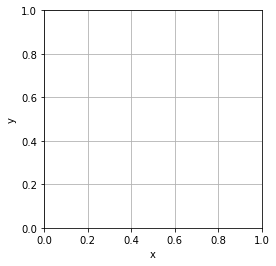

In [4]:
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2. 打ち込んだ点が四分円の内側にあるか否かを判定する
$$
    \begin{eqnarray}
    Judge(point) = 
        \begin{cases}
            Include & (x^2 \ + \ y^2 \leq 1) \\
            not \ Include & (x^2 \ + \ y^2 > 1) \\
        \end{cases}
    \end{eqnarray}
$$

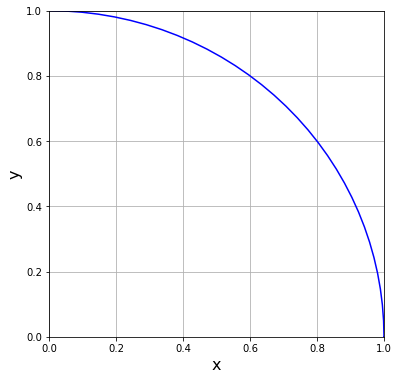

In [11]:
def draw_circle(ax, radius, center=(0,0), n=129,
                color="blue", center_marker=True):

    # 角度θの刻みデータ
    theta = np.linspace(0, 2*np.pi, n)
    # 円周上のx座標とy座標
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    # x軸とy軸のラベルを表示
    ax.set_xlabel("x", fontsize = 16)
    ax.set_ylabel("y", fontsize = 16)
    # データをプロット
    ax.plot(x, y, color=color)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
draw_circle(ax, radius=1, center=(0, 0))

3. 円の内側に存在した点の割合を計算
$$
    Proportion = \frac{The \ number \ of \ point \ Included \ by \ Circle(Henceforth \ P)}{N} 
$$

4. $\pi$を求める 
ある領域に入った点の数は、その領域の面積に比例するはずである。つまり四分円の正方形に対する割合と、3.で求めた割合は一致するはずであるのでそのまま$\pi$を求めることができる。

四分円の面積は、
$$
\begin{align}
    Area &= \frac{1}{4}x^2\pi \\
        &= \frac{\pi}{4} \\
\end{align}
$$
と求められその正方形に対する割合も同じ(÷1なので)。
よって、以下のように式変形することで円周率$\pi$を求められる。
$$
\begin{align}
    \frac{\pi}{4} &= Proportion \\
                  &= \frac{P}{N} \\
\end{align}
$$
$$
\Leftrightarrow \pi = \frac{4P}{N}
$$

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def MonteCalro(N):
    point = 0
    for i in range(N):
        x = random.random()   #random.random()は0.0以上1.0未満のfloat型の乱数を生成
        y = random.random()
        if(x**2 + y**2 < 1.0):   #x, yが四分円の内側にあればpointを加算 
            point += 1
            plt.plot(x, y, "ro")
        else:
            plt.plot(x, y, "bo")
        pi = 4.0 * point / N   #πを求める
    print('N:', N)
    print('円周率:', pi)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

N: 10
円周率: 3.2


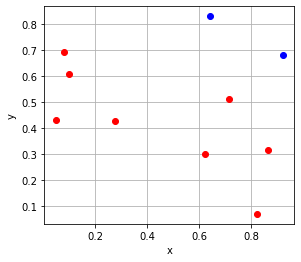

N: 100
円周率: 3.4


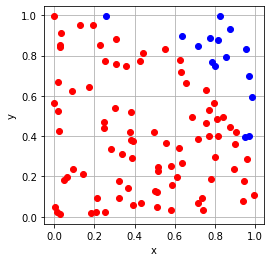

N: 200
円周率: 3.32


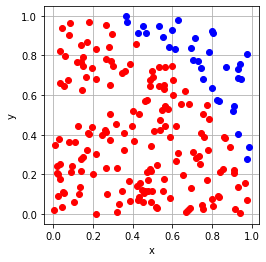

N: 300
円周率: 3.2266666666666666


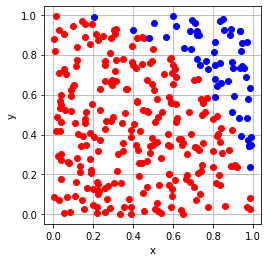

N: 400
円周率: 3.27


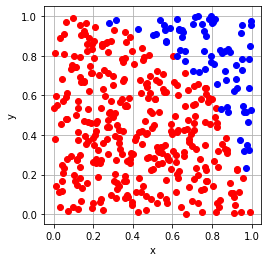

N: 500
円周率: 3.208


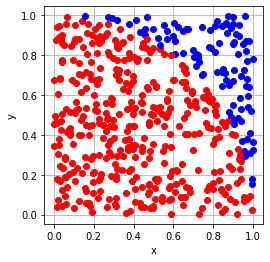

N: 600
円周率: 3.1866666666666665


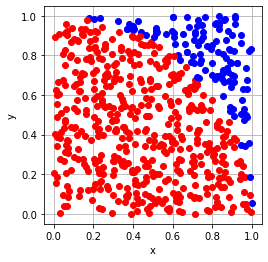

N: 700
円周率: 3.0628571428571427


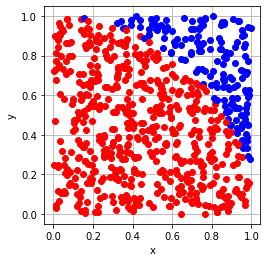

N: 800
円周率: 3.19


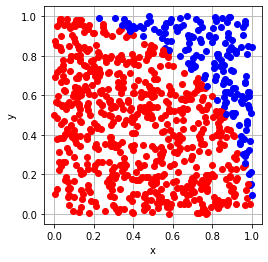

N: 900
円周率: 3.2177777777777776


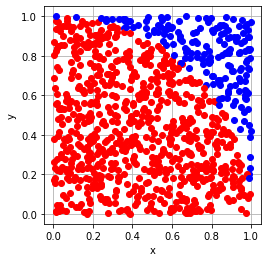

N: 1000
円周率: 3.092


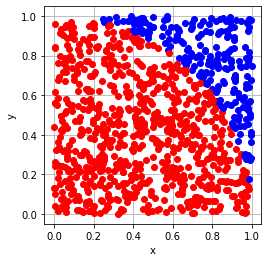

N: 5000
円周率: 3.0944


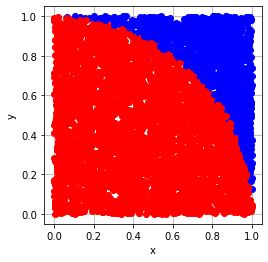

N: 10000
円周率: 3.1608


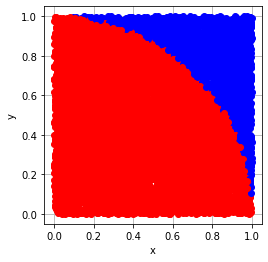

In [6]:
N = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000, 10000]   #Nを少しずつ増やしてどうなるか確認
for n in N:
    MonteCalro(n)

### References
> [モンテカルロ法で円周率を求めるのをPythonで実装](https://note.com/shimakaze_soft/n/n9547f5c0bae0)  
 [モンテカルロ法で円周率を求める](モンテカルロ法で円周率を求める)

---